In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline not required here.

# the data
- let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [122]:
train=pd.read_csv('titanic_train.csv')

In [123]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA 
- we are going to start by checking the null values

# missing data
- we can use seaborn to create simple heatmap to see where we are missing data

In [124]:
# show the missing all values sum column wise
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [125]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


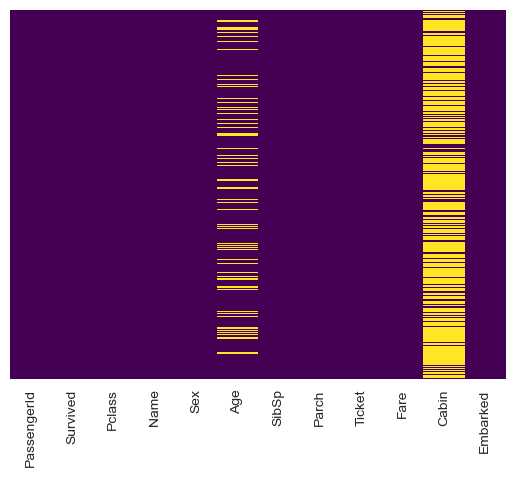

In [126]:
# using heatmap from seaborn to visualise the missing values
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

- approx 25% of data is missing in the age section
- in cabin column we are missing a lot of data so we have to probably drop this.

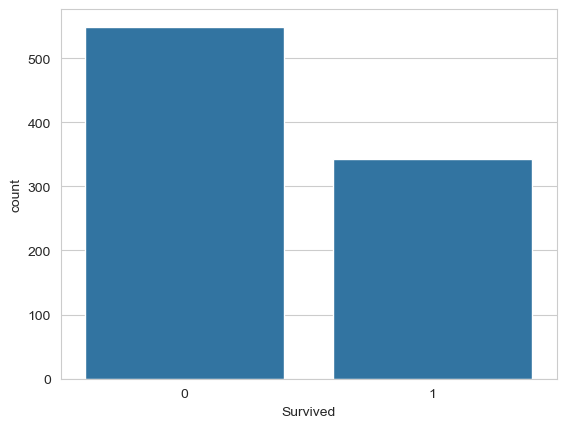

In [127]:
# we use the survived column to check how many passengers were survived
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train)
plt.show()

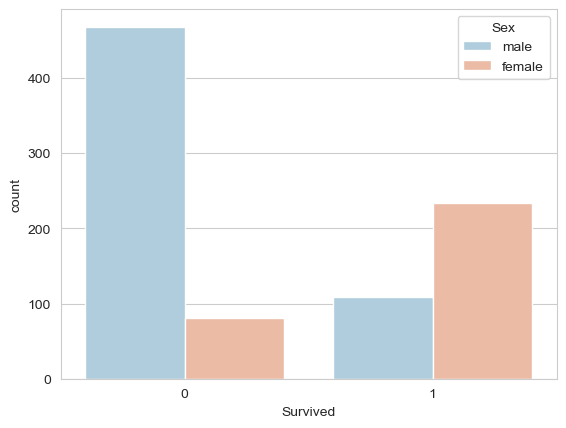

In [128]:
# we are going to deep dive with sex so we get sorvived male and female data
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')
plt.show()

- as we see in the movie they tried to save the females and data is supporting it.

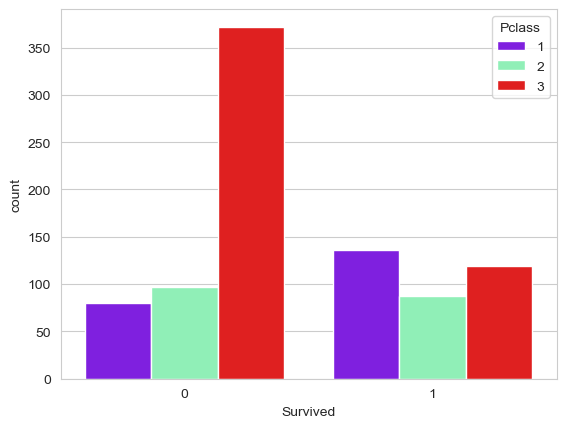

In [129]:
# now we check for the passinger class which class has survived more
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')
plt.show()

- clearly we can see the 1st class passingers are survived and the 3rd class passingers are died approx 3 times they get saved.

C:\Users\krish\AppData\Local\Temp\ipykernel_4840\3223256113.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False,bins=40)


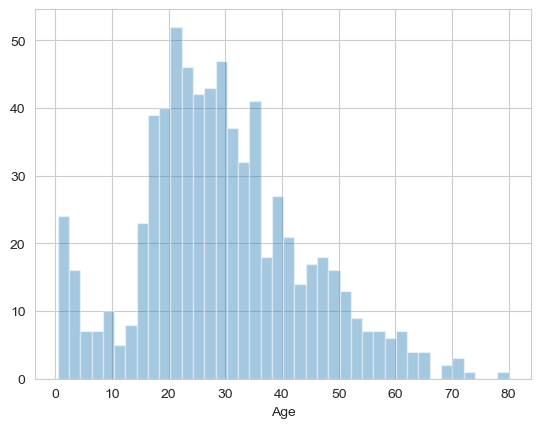

In [130]:
# let us check the age variation and count on the basis of age present on the titanic.
sns.distplot(train['Age'].dropna(),kde=False,bins=40)
plt.show()

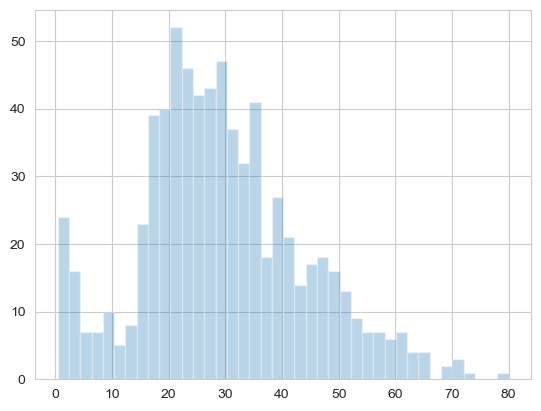

In [131]:
# using the matplot lib to see above graph
train['Age'].hist(bins=40,alpha=0.3)
plt.show()

C:\Users\krish\AppData\Local\Temp\ipykernel_4840\1824925510.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SibSp',data=train,palette="rainbow")


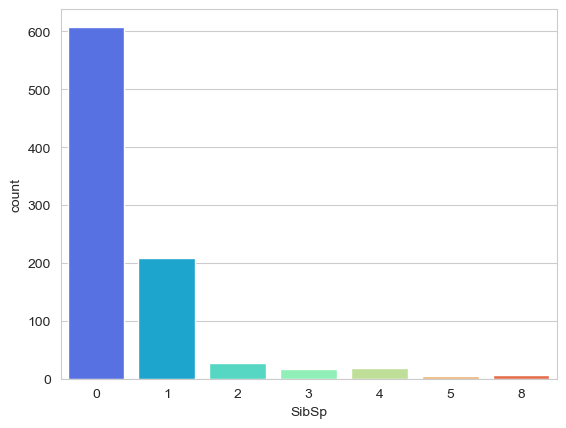

In [132]:
# we visualize how many peoples have seabeling and spousese
sns.countplot(x='SibSp',data=train,palette="rainbow")
plt.show()

- approx 600 peoples are travelling without seabeling

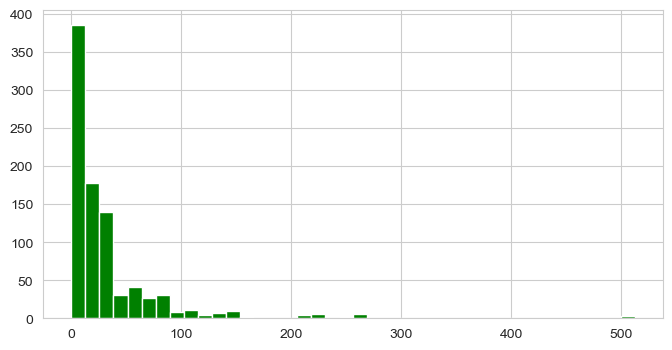

In [133]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))
plt.show()

# Data cleaning
- We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers(imputation).however we can be smarter about this and check the average age by passenger class. for example,

C:\Users\krish\AppData\Local\Temp\ipykernel_4840\4135693399.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

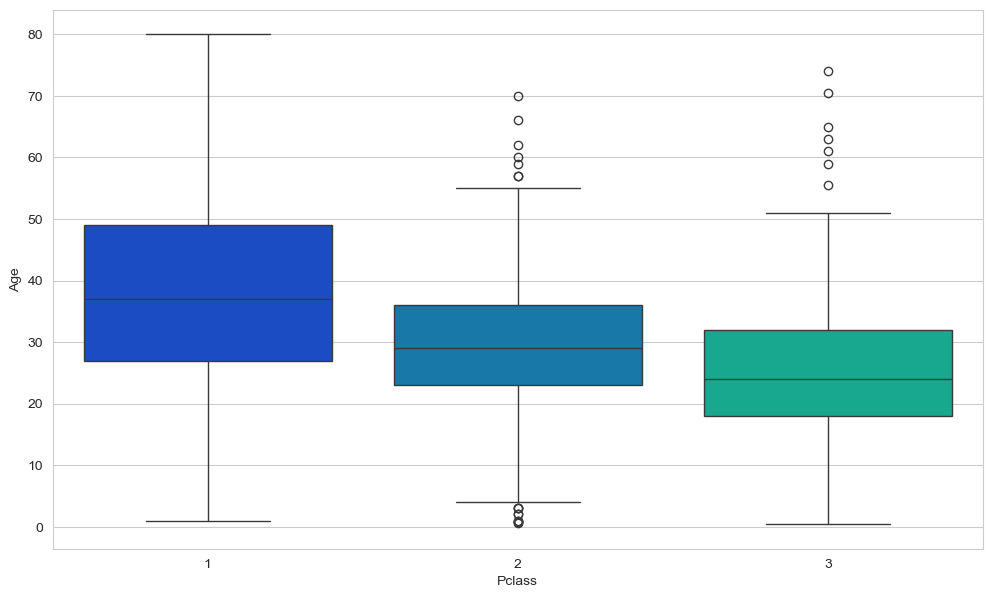

In [134]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

- using box plot we get the average value of age from each class and further below by using impute we are going to replace the age of null values by average age.
- for class 1 = approx 37
- for class 2 = approx 29
- for class 3 = approx 24

In [135]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [136]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\krish\AppData\Local\Temp\ipykernel_4840\3504882855.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=cols[0]
C:\Users\krish\AppData\Local\Temp\ipykernel_4840\3504882855.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=cols[1]


<Axes: >

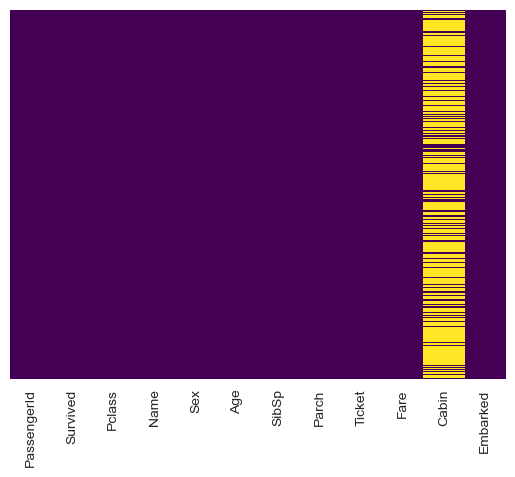

In [137]:
# in the heatmap we cna clearly see we replaced all the null values from age column with average age
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [138]:
# lets drop the cabin column from the data as it have lot of values missing.
train.drop('Cabin',axis=1,inplace=True)

In [139]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# converting categorical function.
- we need not require the passingerid, name, ticket so we are going to drop them.
- there are some categorial columns like, sex have 2 categories male and female, Embarked column have 3 catogeries.

In [140]:
# we are converting the categorical columns in 0s and 1s so we can perform better operations.
pd.get_dummies(train['Embarked'],drop_first=True,dtype=int).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [141]:
# converting sex ans embarked
sex=pd.get_dummies(train['Sex'],drop_first=True,dtype=int)
embark=pd.get_dummies(train['Embarked'],drop_first=True,dtype=int)

In [142]:
# droping the unrequired columns like name, ticket , sex, embarked
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
# we are dropping sex and embarked because we converted it into the categorical column

In [143]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [144]:
# adding sex and embark in the train data
train=pd.concat([train,sex,embark],axis=1)

In [145]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


- our data is ready for the model.